In [21]:
import train_embeddings
import matplotlib.pyplot as plt
import sentence_features
import pickle
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

In [22]:
word2vec_path = "../data/models/word2vec/word2vecGensim_sw_cbow.bin"
word2vec = train_embeddings.load_word2vec_model(word2vec_path)
mapped_reports_path = "../data/processed/processed_reports/preprocessed_all_replace_sw"
# mapped_reports_path = "../data/processed/preprocessed_findings_replace_sw"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))

In [23]:
pipeline = make_pipeline(train_embeddings.WordVectorizer(word2vec), sentence_features.ReportVectorAverager(), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

/Users/scott/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/scott/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([26378, 18950]))
(array([0, 1]), array([6478, 4855]))


In [25]:
clf = SGDClassifier()
clf.fit(trainingX, trainingY)

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [26]:
predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))

(array([0, 1]), array([7765, 3568]))


In [27]:
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

0.8096973094170403
0.5950566426364573


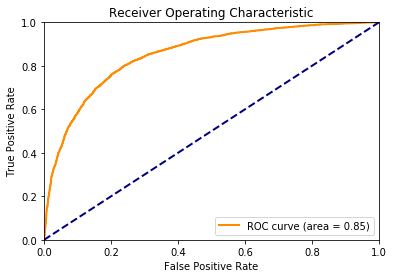

In [28]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
# kNN Classification for word2vec
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(trainingX, trainingY)

predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

(array([0, 1]), array([7141, 4192]))
0.8012881679389313
0.6974667774086378


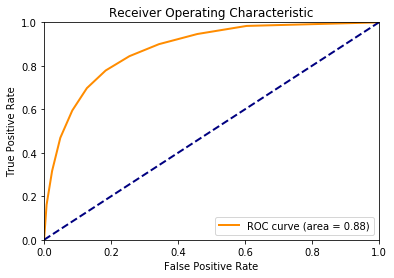

In [10]:
class_probs = clf.predict_proba(testingX)
conf = [c[1] for c in class_probs]

fpr, tpr, thresholds = roc_curve(testingY, conf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Now try FastText
fastText_path = "../data/models/fastText/fastText_sw_cbow400.bin"
ft = train_embeddings.load_fastText_model(fastText_path)

In [30]:
pipeline = make_pipeline(train_embeddings.FastTextReportVectorizer(ft), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

split_point = int(0.9 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([29690, 21452]))
(array([0, 1]), array([3316, 2367]))


In [31]:
clf = SGDClassifier()
clf.fit(trainingX, trainingY)
predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(array([0, 1]), array([3382, 2301]))
0.7279443720121687
0.7076468103084073


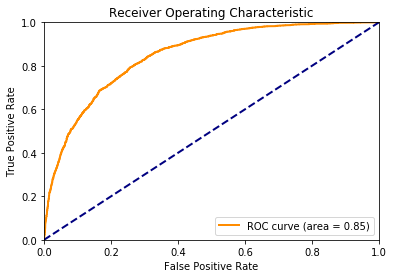

In [32]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# kNN Classification for fastText
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(trainingX, trainingY)

predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

(array([0, 1]), array([3287, 2396]))
0.756677796327212
0.7855285961871751


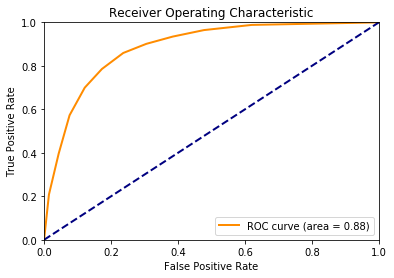

In [16]:
class_probs = clf.predict_proba(testingX)
conf = [c[1] for c in class_probs]

fpr, tpr, thresholds = roc_curve(testingY, conf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Random Forests for FastText
clf = RandomForestClassifier(n_estimators=16)
clf.fit(trainingX, trainingY)

predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

(array([0, 1]), array([3550, 2133]))
0.8157524613220816
0.7351077313054499


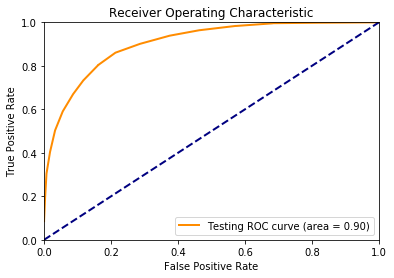

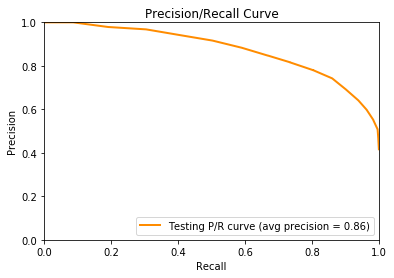

In [34]:
class_probs = clf.predict_proba(testingX)
conf = [c[1] for c in class_probs]

fpr, tpr, thresholds = roc_curve(testingY, conf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Testing ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(testingY, conf)
avg_prec = average_precision_score(testingY, conf)

plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Testing P/R curve (avg precision = %0.2f)' % avg_prec)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# fastText MLP
clf = MLPClassifier(verbose=True, hidden_layer_sizes=(100), alpha=0.001)
clf.fit(trainingX, trainingY)

predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

Iteration 1, loss = 0.55257851
Iteration 2, loss = 0.47275731
Iteration 3, loss = 0.45447459
Iteration 4, loss = 0.44339474
Iteration 5, loss = 0.43450839
Iteration 6, loss = 0.42807220
Iteration 7, loss = 0.42278288
Iteration 8, loss = 0.41750918
Iteration 9, loss = 0.41329919
Iteration 10, loss = 0.40910025
Iteration 11, loss = 0.40558201
Iteration 12, loss = 0.40201612
Iteration 13, loss = 0.39969919
Iteration 14, loss = 0.39627160
Iteration 15, loss = 0.39454017
Iteration 16, loss = 0.39155954
Iteration 17, loss = 0.38854658
Iteration 18, loss = 0.38700685
Iteration 19, loss = 0.38526565
Iteration 20, loss = 0.38285942
Iteration 21, loss = 0.38069981
Iteration 22, loss = 0.37945701
Iteration 23, loss = 0.37729027
Iteration 24, loss = 0.37541251
Iteration 25, loss = 0.37397295
Iteration 26, loss = 0.37160817
Iteration 27, loss = 0.37120812
Iteration 28, loss = 0.36908313
Iteration 29, loss = 0.36765962
Iteration 30, loss = 0.36649895
Iteration 31, loss = 0.36467287
Iteration 32, los

(array([0, 1]), array([3354, 2329]))


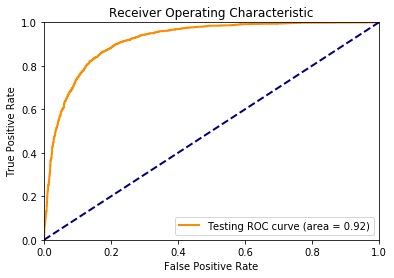

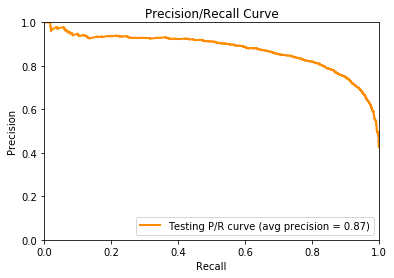

In [36]:
predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))

class_probs = clf.predict_proba(testingX)
conf = [c[1] for c in class_probs]

fpr, tpr, thresholds = roc_curve(testingY, conf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Testing ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(testingY, conf)
avg_prec = average_precision_score(testingY, conf)

plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Testing P/R curve (avg precision = %0.2f)' % avg_prec)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curve')
plt.legend(loc="lower right")
plt.show()